# Pre-Processing and Introduction to Prophet

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ValueWarning)

## Pre-Processamento de Series Temporais

In [5]:
url = 'https://github.com/allanspadini/livro-val-allan/raw/main/GlobalLandTemperaturesByCountry.csv'

dados = pd.read_csv(url)

dados.head()

dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland

In [6]:
# Rename Columns
dados.columns = ['Data', 'Temperatura', 'Incerteza', 'País']

# Convert the date index to datetime
dados = dados.set_index('Data')
dados.index = pd.to_datetime(dados.index)

dados.head()

Temperatura  Incerteza   País
Data                                     
1743-11-01        4.384      2.294  Åland
1743-12-01          NaN        NaN  Åland
1744-01-01          NaN        NaN  Åland
1744-02-01          NaN        NaN  Åland
1744-03-01          NaN        NaN  Åland

In [7]:
dados_br = dados.query('País == "Brazil"')

dados_br.head()

Temperatura  Incerteza    País
Data                                      
1832-01-01       24.935      1.372  Brazil
1832-02-01       24.505      1.953  Brazil
1832-03-01       24.617      1.359  Brazil
1832-04-01       23.990      2.013  Brazil
1832-05-01       23.124      1.592  Brazil

In [8]:
dados_br.isnull().sum()

Temperatura    17
Incerteza      17
País            0
dtype: int64

In [9]:
dados_br = dados_br.dropna()

dados_br.isnull().sum()

Temperatura    0
Incerteza      0
País           0
dtype: int64

In [10]:
dados_br['Temperatura'].describe()

count    2164.000000
mean       24.699256
std         0.978787
min        21.797000
25%        24.022500
50%        24.829500
75%        25.449750
max        27.151000
Name: Temperatura, dtype: float64

In [11]:
dados_br.tail()

Temperatura  Incerteza    País
Data                                      
2013-04-01       25.464      0.253  Brazil
2013-05-01       24.906      0.236  Brazil
2013-06-01       24.788      0.251  Brazil
2013-07-01       24.202      0.201  Brazil
2013-08-01       24.736      0.247  Brazil

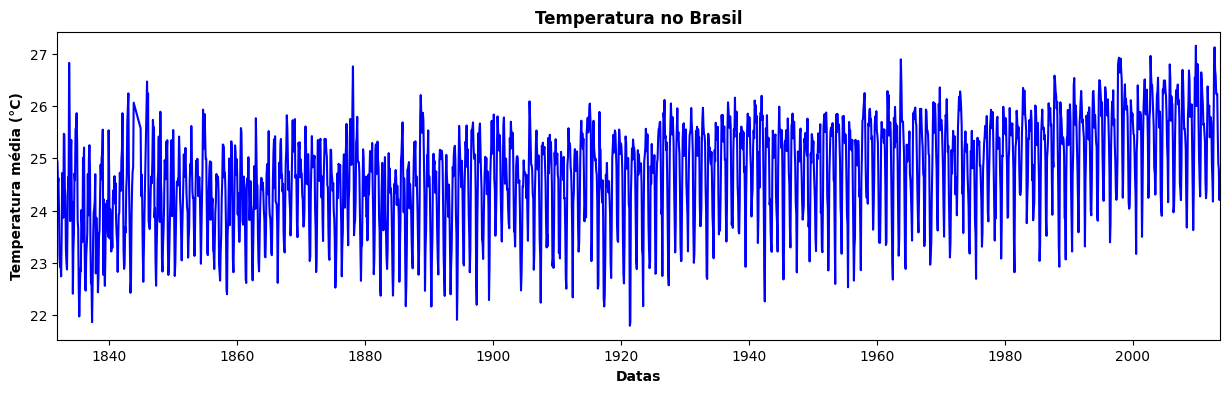

In [12]:
plt.figure(figsize=(15, 4))
sns.lineplot(x='Data', y='Temperatura', data=dados_br, color='blue')
plt.title('Temperatura no Brasil', weight = 'bold')
plt.xlabel('Datas', weight = 'bold') 
plt.ylabel('Temperatura média (°C)', weight = 'bold')
plt.xlim(pd.to_datetime('1832-01-01'), pd.to_datetime('2013-08-01'))
plt.show();

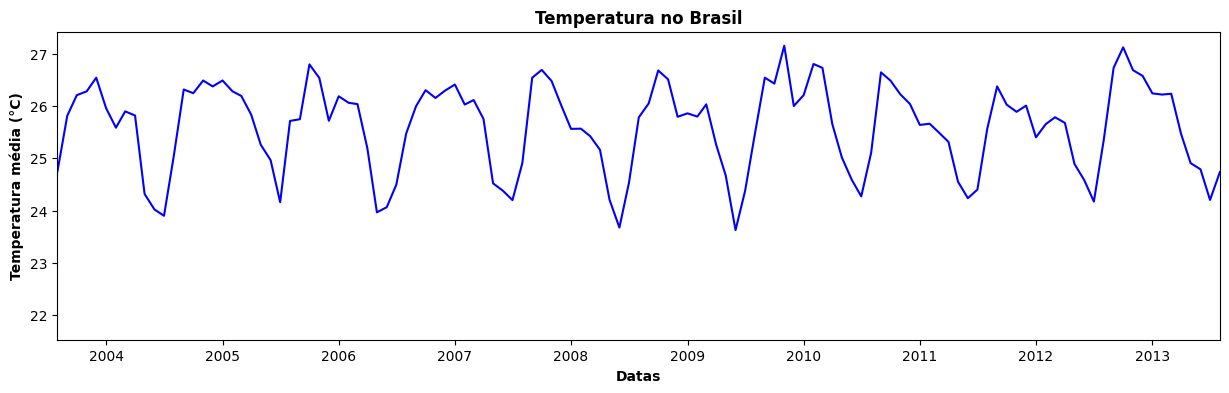

In [13]:
plt.figure(figsize=(15, 4))
sns.lineplot(x='Data', y='Temperatura', data=dados_br, color='blue')
plt.title('Temperatura no Brasil', weight = 'bold')
plt.xlabel('Datas', weight = 'bold') 
plt.ylabel('Temperatura média (°C)', weight = 'bold')
plt.xlim(pd.to_datetime('2003-08-01'), pd.to_datetime('2013-08-01'))
plt.show();

In [14]:
# Ensure index is in datetime format
dados_br.index = pd.to_datetime(dados_br.index)

# Extract month from index instead of a column
dados_br['Mês'] = dados_br.index.month

# Display the first 10 rows
dados_br.head(10)

Temperatura  Incerteza    País  Mês
Data                                           
1832-01-01       24.935      1.372  Brazil    1
1832-02-01       24.505      1.953  Brazil    2
1832-03-01       24.617      1.359  Brazil    3
1832-04-01       23.990      2.013  Brazil    4
1832-05-01       23.124      1.592  Brazil    5
1832-06-01       22.924      1.528  Brazil    6
1832-07-01       22.974      1.930  Brazil    7
1832-08-01       22.741      1.568  Brazil    8
1832-09-01       23.560      1.996  Brazil    9
1832-10-01       24.718      1.592  Brazil   10

In [15]:
# Drop non-numeric columns before computing the mean
temperatura = dados_br.drop(columns=['País']).groupby(['Mês']).mean()

# Display the result
temperatura

Temperatura  Incerteza
Mês                        
1      25.263696   0.622724
2      25.258972   0.587928
3      25.143144   0.560083
4      24.615188   0.568337
5      23.971238   0.539182
6      23.325945   0.586044
7      23.332978   0.586433
8      24.263823   0.554094
9      25.114278   0.548300
10     25.395045   0.547358
11     25.452235   0.555642
12     25.271603   0.619134

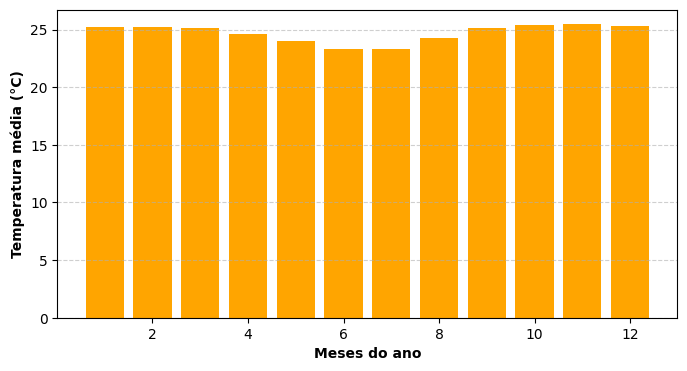

In [16]:
plt.figure(figsize=(8,4)) 
plt.rcParams['font.size'] = '10'
plt.bar(temperatura.index, temperatura['Temperatura'].values, color='orange')
plt.xlabel('Meses do ano', weight = 'bold') 
plt.ylabel('Temperatura média (°C)', weight = 'bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [17]:
media_movel = dados_br['Temperatura'].rolling(30).mean()
media_movel

Data
1832-01-01          NaN
1832-02-01          NaN
1832-03-01          NaN
1832-04-01          NaN
1832-05-01          NaN
                ...    
2013-04-01    25.672100
2013-05-01    25.628300
2013-06-01    25.586633
2013-07-01    25.538800
2013-08-01    25.508033
Name: Temperatura, Length: 2164, dtype: float64

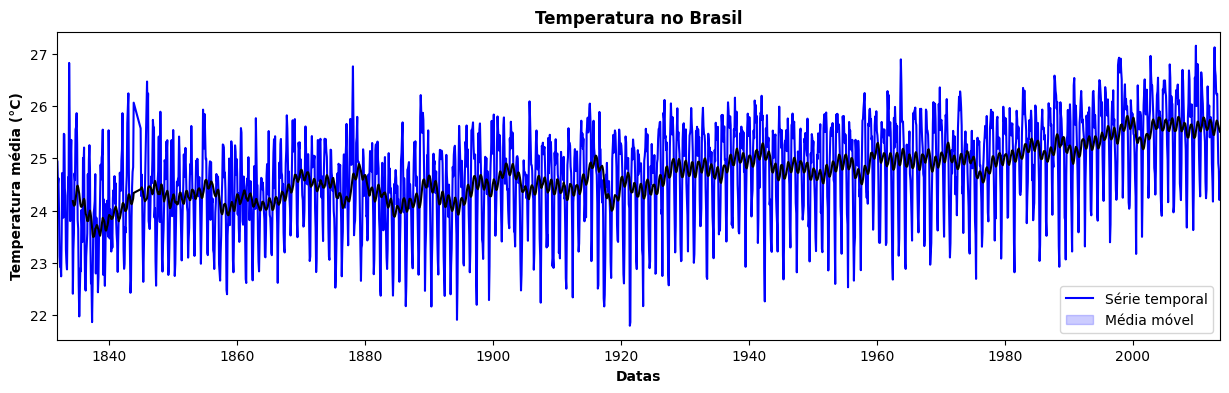

In [18]:
plt.figure(figsize=(15, 4))

sns.lineplot(x='Data', y='Temperatura', data=dados_br, color='blue')
sns.lineplot(x='Data',y=media_movel,data=dados_br,color='black')

plt.title('Temperatura no Brasil', weight = 'bold')
plt.xlabel('Datas', weight = 'bold') 
plt.ylabel('Temperatura média (°C)', weight = 'bold')
plt.xlim(pd.to_datetime('1832-01-01'), pd.to_datetime('2013-08-01'))

plt.legend(labels=['Série temporal','Média móvel'])
plt.show();

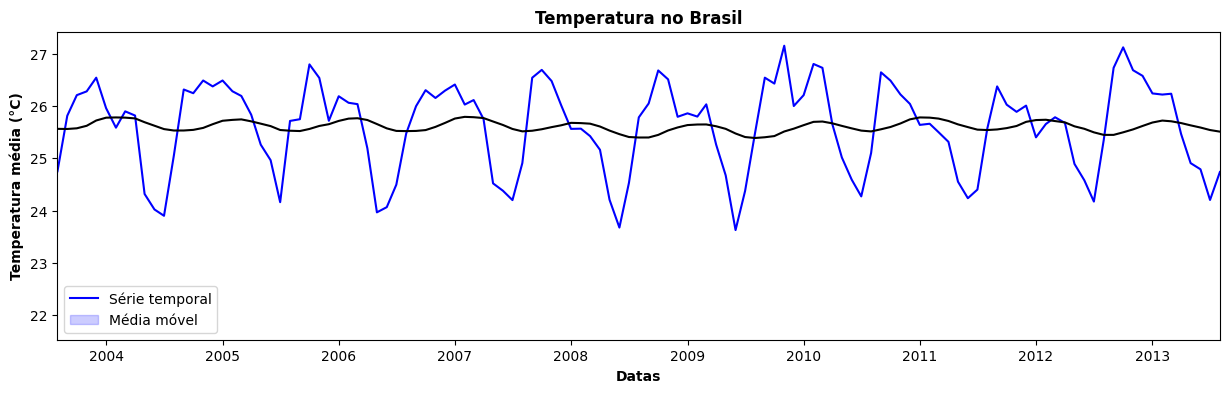

In [19]:
plt.figure(figsize=(15, 4))

sns.lineplot(x='Data', y='Temperatura', data=dados_br, color='blue')
sns.lineplot(x='Data',y=media_movel,data=dados_br,color='black')

plt.title('Temperatura no Brasil', weight = 'bold')
plt.xlabel('Datas', weight = 'bold') 
plt.ylabel('Temperatura média (°C)', weight = 'bold')
plt.xlim(pd.to_datetime('2003-08-01'), pd.to_datetime('2013-08-01'))

plt.legend(labels=['Série temporal','Média móvel'])
plt.show();

# Capitulo 2 - Prophet

In [21]:
from prophet import Prophet

In [22]:
dados_br.head()

Temperatura  Incerteza    País  Mês
Data                                           
1832-01-01       24.935      1.372  Brazil    1
1832-02-01       24.505      1.953  Brazil    2
1832-03-01       24.617      1.359  Brazil    3
1832-04-01       23.990      2.013  Brazil    4
1832-05-01       23.124      1.592  Brazil    5

In [23]:
# Reset index to make 'Data' a column
dados_br = dados_br.reset_index()

# Display the first rows
dados_br.head()

Data  Temperatura  Incerteza    País  Mês
0 1832-01-01       24.935      1.372  Brazil    1
1 1832-02-01       24.505      1.953  Brazil    2
2 1832-03-01       24.617      1.359  Brazil    3
3 1832-04-01       23.990      2.013  Brazil    4
4 1832-05-01       23.124      1.592  Brazil    5

In [24]:
df = pd.DataFrame()

df['ds'] = dados_br['Data']
df['y'] = dados_br['Temperatura']

df.head()

ds       y
0 1832-01-01  24.935
1 1832-02-01  24.505
2 1832-03-01  24.617
3 1832-04-01  23.990
4 1832-05-01  23.124

In [25]:
# Criar  uma  instância  da classe  do  modelo
modelo = Prophet()

# Fazer o ajuste do modelo com os dados
modelo.fit(df)

11:37:26 - cmdstanpy - INFO - Chain [1] start processing
11:37:27 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
# Criar DataFrame de datas futuras, em seguida, chamar o metodo de previsao
dataFramefuturo = modelo.make_future_dataframe(periods=0)  # periods = 0, so para checar o ajuste dos dados
dataFramefuturo

ds
0    1832-01-01
1    1832-02-01
2    1832-03-01
3    1832-04-01
4    1832-05-01
...         ...
2159 2013-04-01
2160 2013-05-01
2161 2013-06-01
2162 2013-07-01
2163 2013-08-01

[2164 rows x 1 columns]

In [27]:
# Vraiavel previsao
previsao = modelo.predict(dataFramefuturo)
previsao.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 1832-01-01  23.961029   24.032450   25.156544    23.961029    23.961029   
1 1832-02-01  23.962102   23.995433   25.103696    23.962102    23.962102   
2 1832-03-01  23.963105   23.701274   24.863475    23.963105    23.963105   
3 1832-04-01  23.964178   23.252031   24.378183    23.964178    23.964178   
4 1832-05-01  23.965216   22.651819   23.755615    23.965216    23.965216   

   additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
0        0.599630              0.599630              0.599630  0.599630   
1        0.581418              0.581418              0.581418  0.581418   
2        0.349733              0.349733              0.349733  0.349733   
3       -0.154115             -0.154115             -0.154115 -0.154115   
4       -0.779416             -0.779416             -0.779416 -0.779416   

   yearly_lower  yearly_upper  multiplicative_terms  \
0      0.599630      0.599630                   0.0   
1      0.581418      0.581418                   0.0   
2      0.349733      0.349733                   0.0   
3     -0.154115     -0.154115                   0.0   
4     -0.779416     -0.779416                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                         0.0                         0.0  24.560659  
1                         0.0                         0.0  24.543520  
2                         0.0                         0.0  24.312838  
3                         0.0                         0.0  23.810062  
4                         0.0                         0.0  23.185799

In [28]:
previsao.head(3).T

0                    1  \
ds                          1832-01-01 00:00:00  1832-02-01 00:00:00   
trend                                 23.961029            23.962102   
yhat_lower                             24.03245            23.995433   
yhat_upper                            25.156544            25.103696   
trend_lower                           23.961029            23.962102   
trend_upper                           23.961029            23.962102   
additive_terms                          0.59963             0.581418   
additive_terms_lower                    0.59963             0.581418   
additive_terms_upper                    0.59963             0.581418   
yearly                                  0.59963             0.581418   
yearly_lower                            0.59963             0.581418   
yearly_upper                            0.59963             0.581418   
multiplicative_terms                        0.0                  0.0   
multiplicative_terms_lower                  0.0                  0.0   
multiplicative_terms_upper                  0.0                  0.0   
yhat                                  24.560659             24.54352   

                                              2  
ds                          1832-03-01 00:00:00  
trend                                 23.963105  
yhat_lower                            23.701274  
yhat_upper                            24.863475  
trend_lower                           23.963105  
trend_upper                           23.963105  
additive_terms                         0.349733  
additive_terms_lower                   0.349733  
additive_terms_upper                   0.349733  
yearly                                 0.349733  
yearly_lower                           0.349733  
yearly_upper                           0.349733  
multiplicative_terms                        0.0  
multiplicative_terms_lower                  0.0  
multiplicative_terms_upper                  0.0  
yhat                                  24.312838

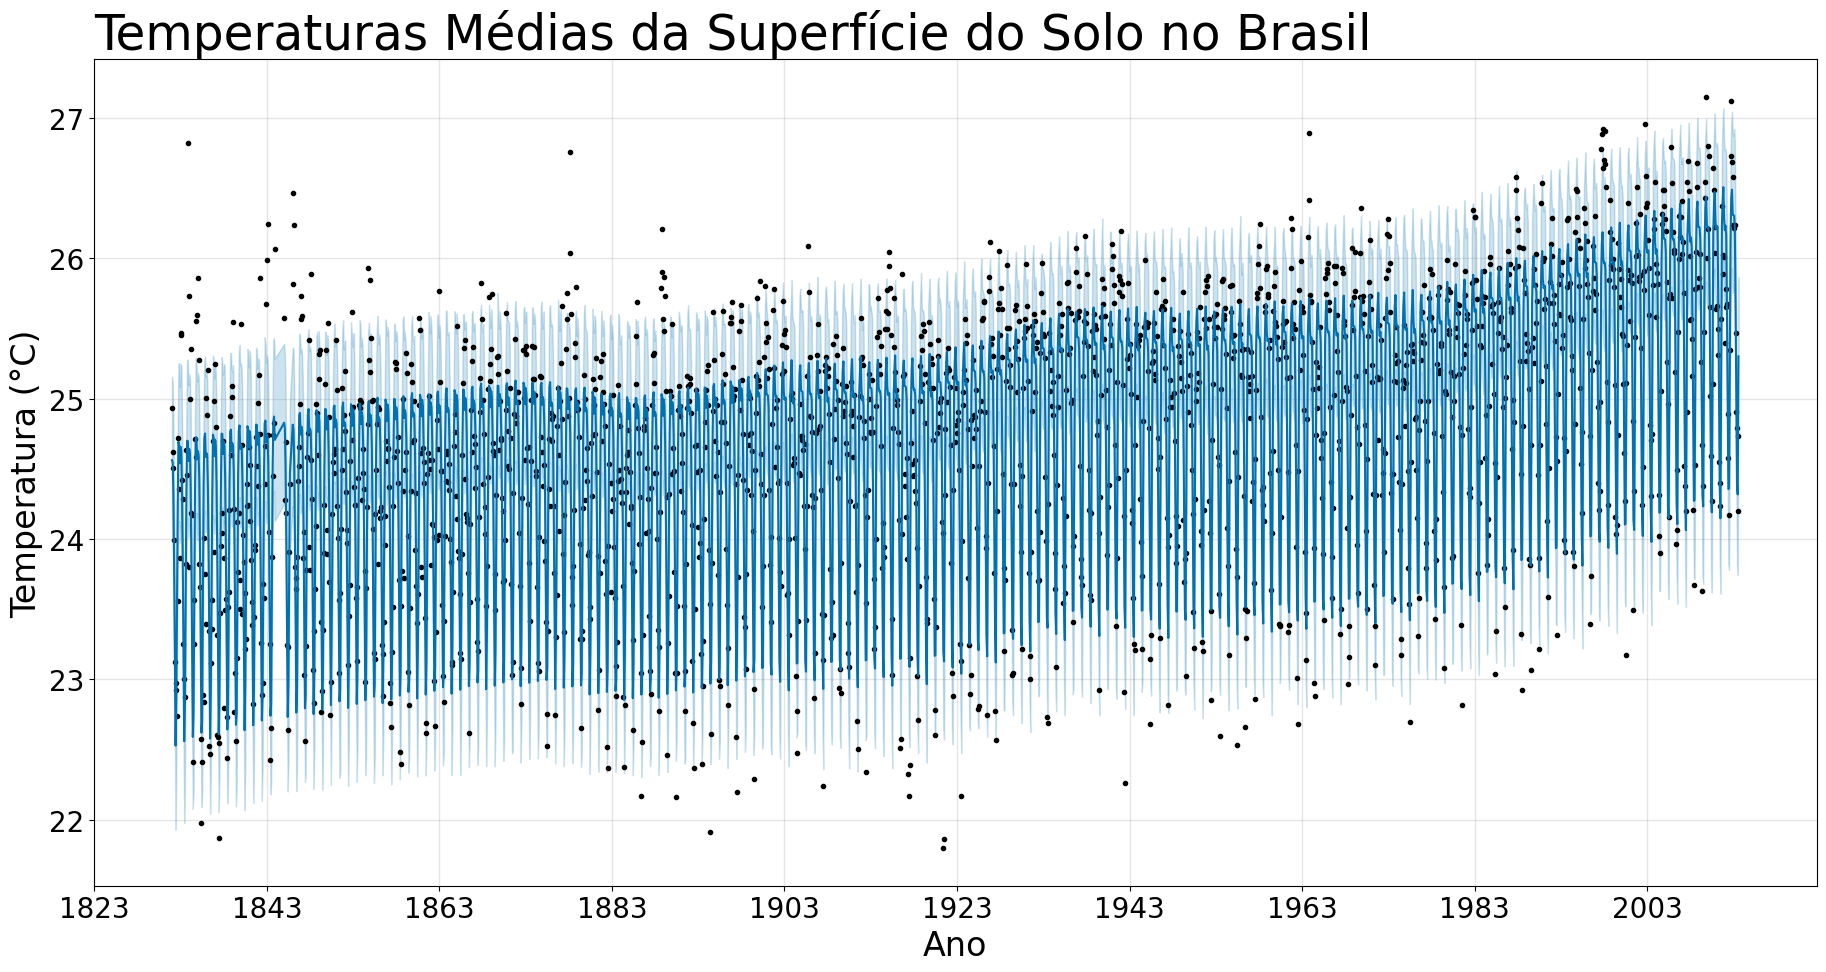

In [29]:
modelo.plot(previsao, figsize=(18,9));
plt.title('Temperaturas Médias da Superfície do Solo no Brasil ', loc = 'left', fontsize = 35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Ano', fontsize=24)
plt.ylabel('Temperatura (°C)', fontsize=24)
plt.show()

In [30]:
media_movel = dados_br['Temperatura'].rolling(30).mean()

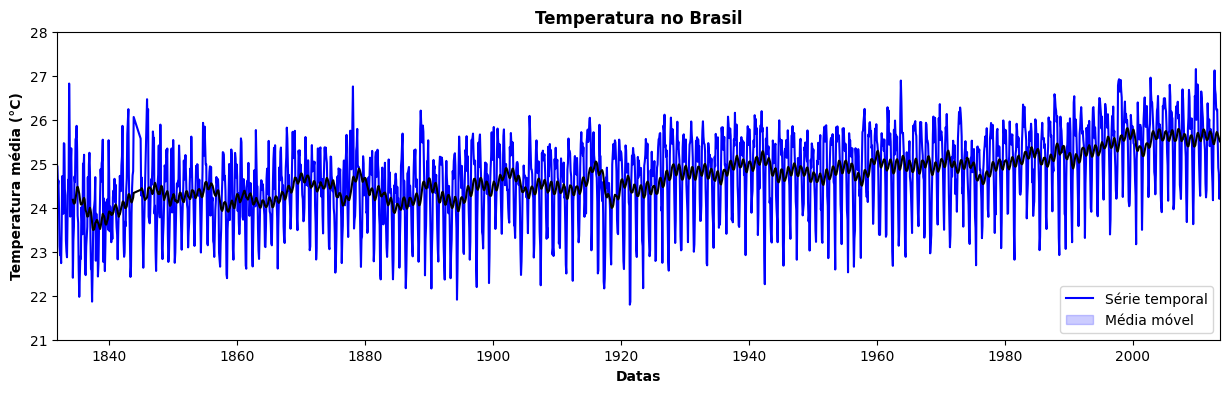

In [31]:
plt.figure(figsize=(15, 4))

sns.lineplot(x='Data', y='Temperatura', data=dados_br, color='blue')
sns.lineplot(x='Data',y=media_movel,data=dados_br,color='black')

plt.title('Temperatura no Brasil', weight = 'bold')
plt.xlabel('Datas', weight = 'bold') 
plt.ylabel('Temperatura média (°C)', weight = 'bold')
plt.xlim(pd.to_datetime('1832-01-01'), pd.to_datetime('2013-08-01'))
plt.ylim(21,28)
plt.legend(labels=['Série temporal','Média móvel'])
plt.show();

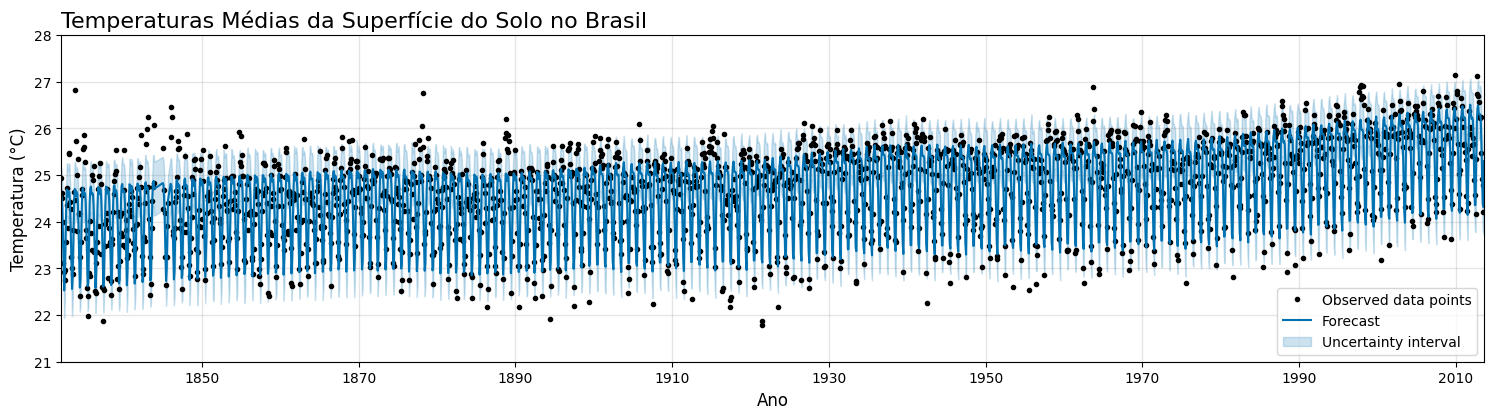

In [32]:
modelo.plot(previsao, figsize=(15,4));
plt.title('Temperaturas Médias da Superfície do Solo no Brasil ', loc = 'left', fontsize = 16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.xlim(pd.to_datetime('1832-01-01'), pd.to_datetime('2013-08-01'))
plt.ylim(21,28)
plt.legend()
plt.show()

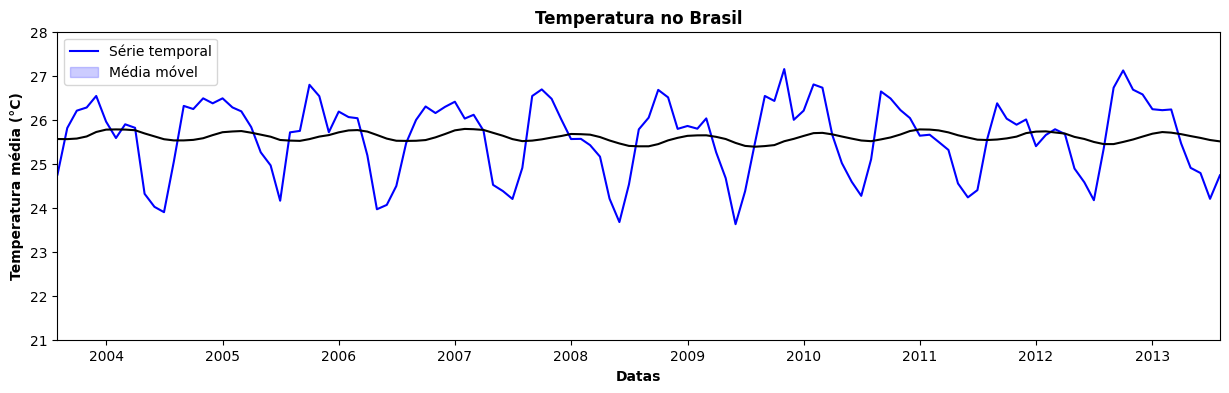

In [33]:
plt.figure(figsize=(15, 4))

sns.lineplot(x='Data', y='Temperatura', data=dados_br, color='blue')
sns.lineplot(x='Data',y=media_movel,data=dados_br,color='black')

plt.title('Temperatura no Brasil', weight = 'bold')
plt.xlabel('Datas', weight = 'bold') 
plt.ylabel('Temperatura média (°C)', weight = 'bold')
plt.xlim(pd.to_datetime('2003-08-01'), pd.to_datetime('2013-08-01'))
plt.ylim(21,28)
plt.legend(labels=['Série temporal','Média móvel'])
plt.show();

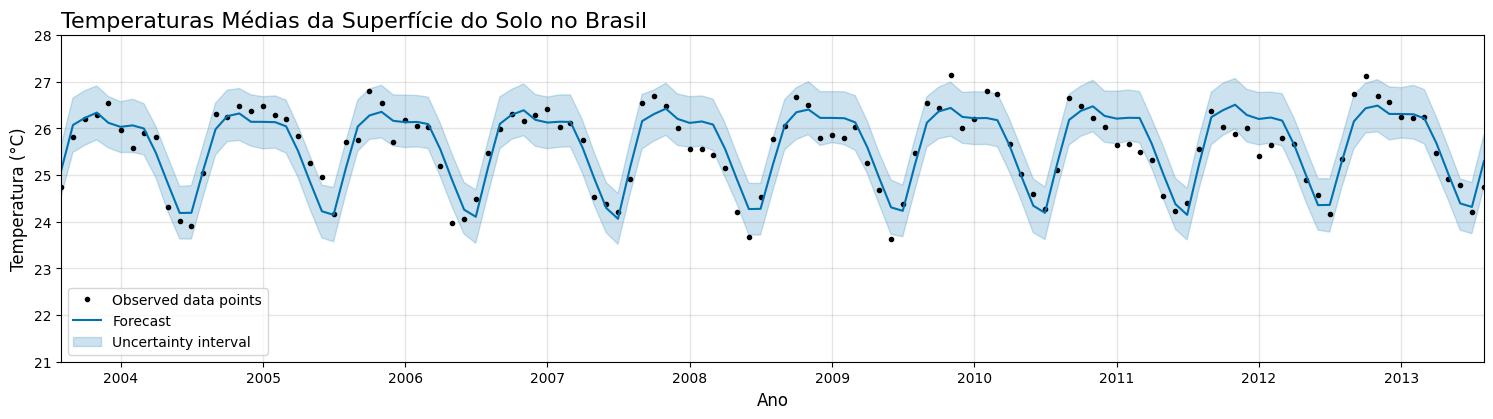

In [34]:
modelo.plot(previsao, figsize=(15,4));
plt.title('Temperaturas Médias da Superfície do Solo no Brasil ', loc = 'left', fontsize = 16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.xlim(pd.to_datetime('2003-08-01'), pd.to_datetime('2013-08-01'))
plt.ylim(21,28)
plt.legend()
plt.show()

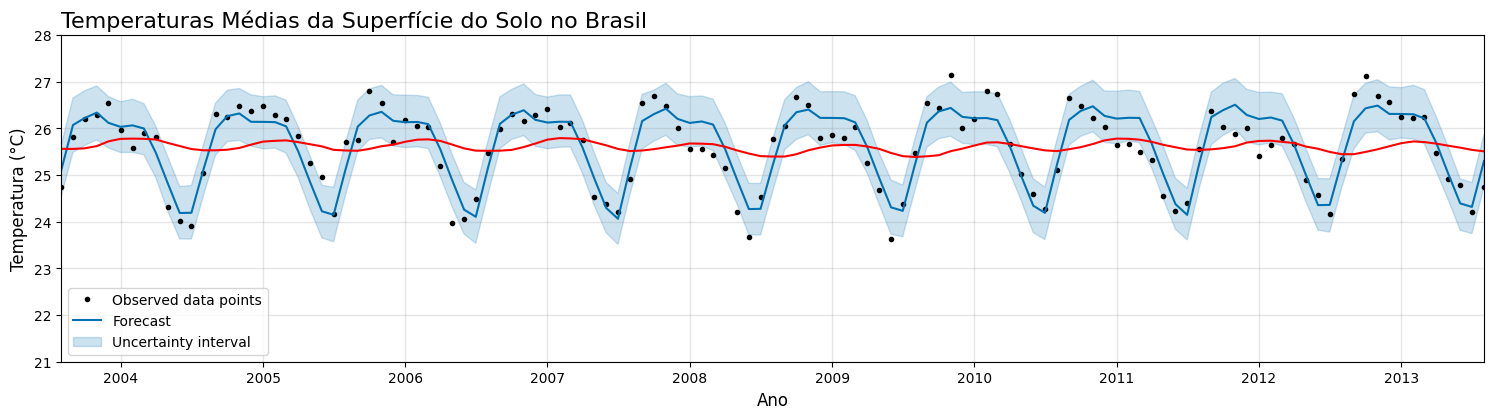

In [35]:
modelo.plot(previsao, figsize=(15,4));
sns.lineplot(x='Data',y=media_movel,data=dados_br,color='red') #<==== Media movel
plt.title('Temperaturas Médias da Superfície do Solo no Brasil ', loc = 'left', fontsize = 16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.xlim(pd.to_datetime('2003-08-01'), pd.to_datetime('2013-08-01'))
plt.ylim(21,28)
plt.legend()
plt.show()

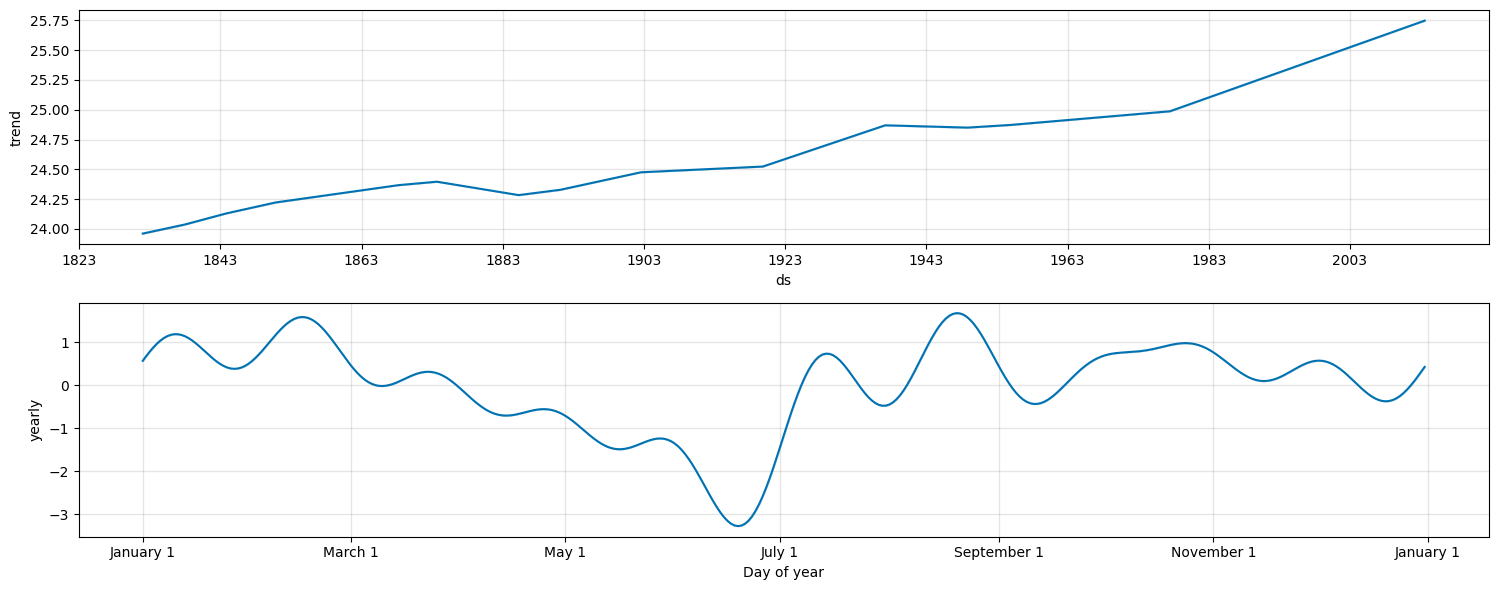

In [36]:
modelo.plot_components(previsao, figsize=(15,6));

In [37]:
# Initialize the Prophet forecasting model
modelo = Prophet()  

# Fit the model using historical data
modelo.fit(df) 

# Create a future dataframe for forecasting
dataFramefuturo = modelo.make_future_dataframe(periods=120,   # periods=120: Forecasts for the next 120 months (10 years)
                                               freq='ME')     # freq='M': Monthly frequency 
# Make predictions using the trained model
previsao = modelo.predict(dataFramefuturo)  

11:37:28 - cmdstanpy - INFO - Chain [1] start processing
11:37:29 - cmdstanpy - INFO - Chain [1] done processing


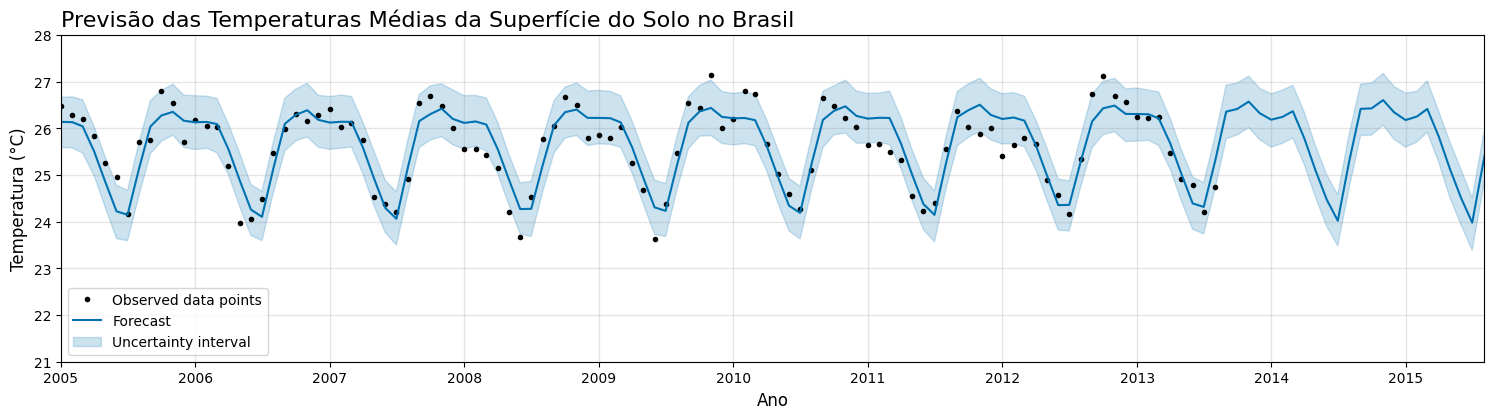

In [38]:
modelo.plot(previsao, figsize=(15,4));
plt.title('Previsão das Temperaturas Médias da Superfície do Solo no Brasil', loc = 'left', fontsize = 16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.xlim(pd.to_datetime('2005-01-01'), pd.to_datetime('2015-08-01'))
plt.ylim(21,28)
plt.legend()
plt.show()

In [39]:
# Create an empty DataFrame for training data
df_treino = pd.DataFrame()  

# Assign the first 2000 rows to the training dataset
df_treino['ds'] = dados_br['Data'][:2000]        
df_treino['y'] = dados_br['Temperatura'][:2000]  


# Create an empty DataFrame for testing data
df_teste = pd.DataFrame()  

# Assign the remaining rows to the test dataset
df_teste['ds'] = dados_br['Data'][2000:]        
df_teste['y'] = dados_br['Temperatura'][2000:] 

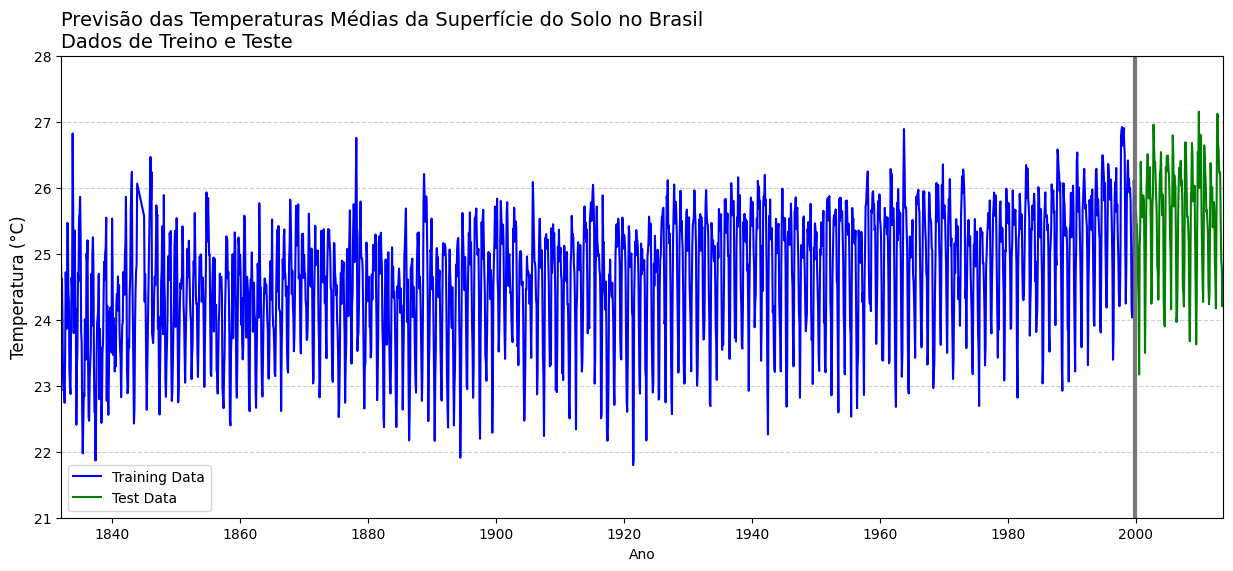

In [40]:
# Plot the forecasted data using the trained Prophet model
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the training data in blue
ax.plot(df_treino['ds'], df_treino['y'], '-', color='blue', label='Training Data')

# Plot the test data in green
ax.plot(df_teste['ds'], df_teste['y'], '-', color='green', label='Test Data')

# Draw a vertical line to indicate the end of the training period
ax.axvline(x=df_treino['ds'].max(), c='dimgray', lw=3, alpha=0.9, ls='-')

# Formatting the plot
ax.tick_params(axis='x', labelsize=10)  
ax.tick_params(axis='y', labelsize=10)  
ax.set_xlabel('Ano', fontsize=10)  
ax.set_ylabel('Temperatura (°C)', fontsize=12) 
ax.set_title('Previsão das Temperaturas Médias da Superfície do Solo no Brasil \nDados de Treino e Teste', loc='left', fontsize=14) 
ax.set_xlim(pd.to_datetime('1832-01-01'), pd.to_datetime('2013-09-01'))
ax.grid(axis='y', linestyle='--', alpha=0.6) 
ax.set_ylim(21,28)

# Show legend
ax.legend(loc=3)

# Show the plot
plt.show()

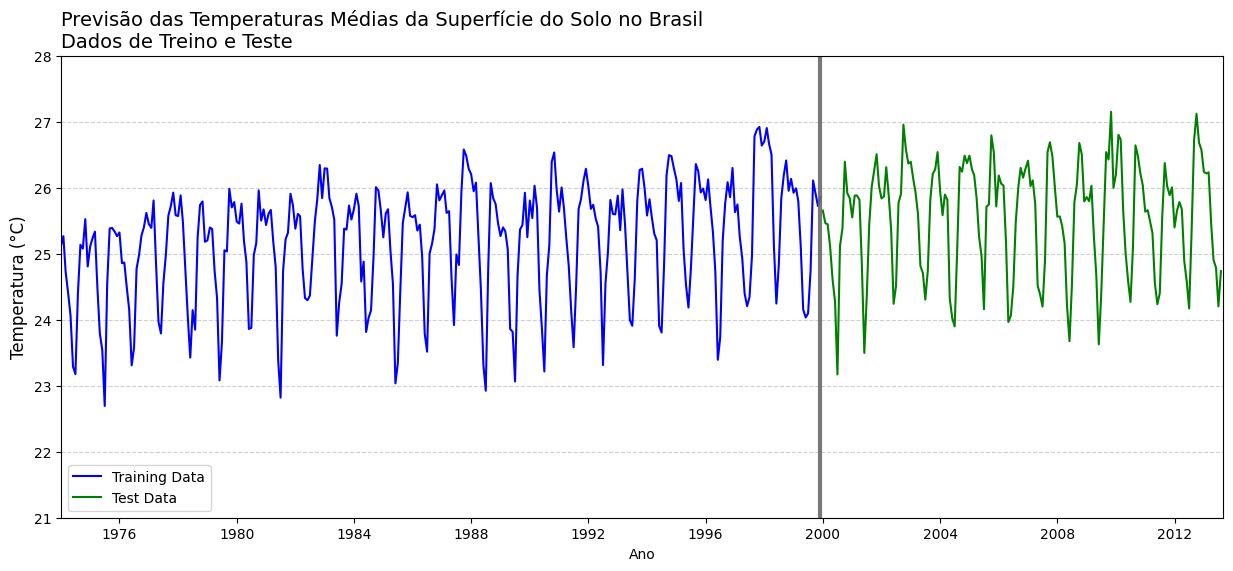

In [41]:
# Plot the forecasted data using the trained Prophet model
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the training data in blue
ax.plot(df_treino['ds'], df_treino['y'], '-', color='blue', label='Training Data')

# Plot the test data in green
ax.plot(df_teste['ds'], df_teste['y'], '-', color='green', label='Test Data')

# Draw a vertical line to indicate the end of the training period
ax.axvline(x=df_treino['ds'].max(), c='dimgray', lw=3, alpha=0.9, ls='-')

# Formatting the plot
ax.tick_params(axis='x', labelsize=10)  
ax.tick_params(axis='y', labelsize=10)  
ax.set_xlabel('Ano', fontsize=10)  
ax.set_ylabel('Temperatura (°C)', fontsize=12) 
ax.set_title('Previsão das Temperaturas Médias da Superfície do Solo no Brasil \nDados de Treino e Teste', loc='left', fontsize=14) 
ax.set_xlim(pd.to_datetime('1974-01-01'), pd.to_datetime('2013-09-01'))
ax.grid(axis='y', linestyle='--', alpha=0.6) 
ax.set_ylim(21,28)

# Show legend
ax.legend(loc=3)

# Show the plot
plt.show()

In [42]:
# Instantiate the Prophet model for time series forecasting
modelo = Prophet()  

# Fit the model using the training dataset
modelo.fit(df_treino)  

# Create a future DataFrame with 150 months into the future
dataFramefuturo = modelo.make_future_dataframe(periods=150, freq='M')  

# Generate predictions using the trained model
previsao = modelo.predict(dataFramefuturo)  

11:37:31 - cmdstanpy - INFO - Chain [1] start processing
11:37:31 - cmdstanpy - INFO - Chain [1] done processing


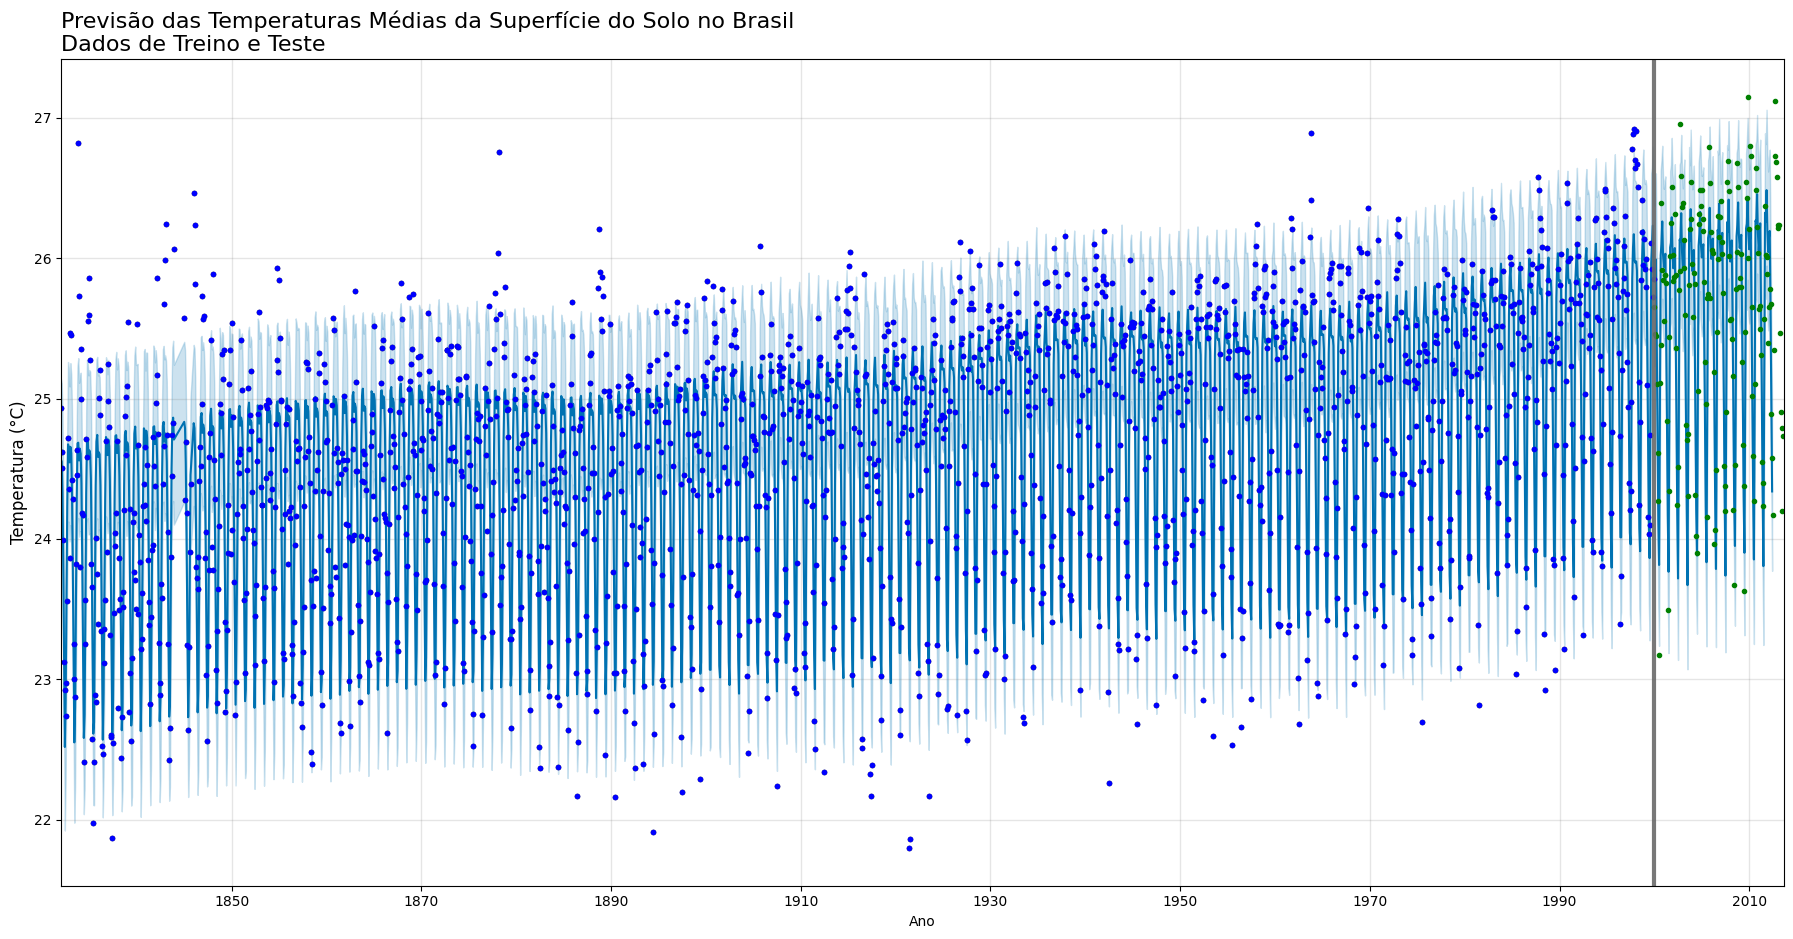

In [43]:
# Plot the forecasted data using the trained Prophet model
fig = modelo.plot(previsao, figsize=(18,9))  

# Get the axis object from the figure
ax = fig.gca()  # Use gca() to get the current axis instead of adding a new subplot

# Plot the training data in blue
ax.plot(df_treino['ds'], df_treino['y'], '.', color='blue', label='Training Data')

# Plot the test data in green
ax.plot(df_teste['ds'], df_teste['y'], '.', color='green', label='Test Data')

# Draw a vertical line to indicate the end of the training period
ax.axvline(x=df_treino['ds'].max(), c='dimgray', lw=3, alpha=0.9, ls='-')

# Formatting the plot
ax.tick_params(axis='x', labelsize=10) 
ax.tick_params(axis='y', labelsize=10)  
ax.set_xlabel('Ano', fontsize=10)  
ax.set_ylabel('Temperatura (°C)', fontsize=12)  
ax.set_title('Previsão das Temperaturas Médias da Superfície do Solo no Brasil \nDados de Treino e Teste', loc='left', fontsize=16)  
plt.xlim(pd.to_datetime('1832-01-01'), pd.to_datetime('2013-09-01'))

# Show the plot
plt.show()


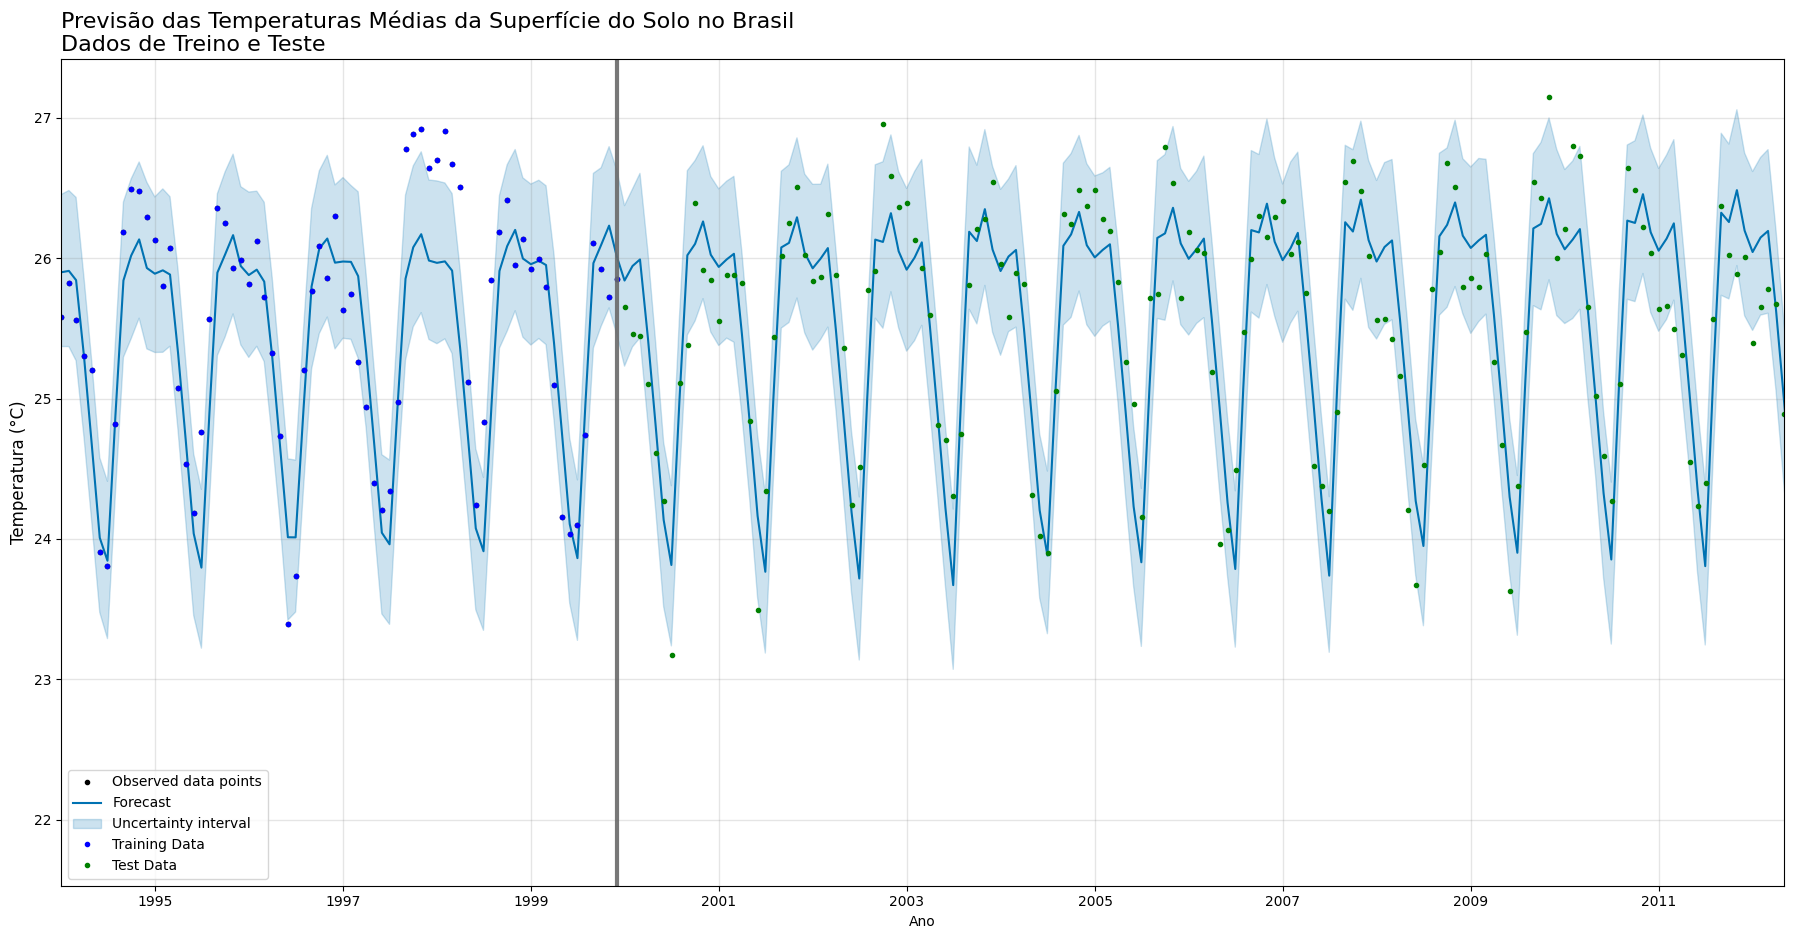

In [44]:
# Plot the forecasted data using the trained Prophet model
fig = modelo.plot(previsao, figsize=(18,9))  

# Get the axis object from the figure
ax = fig.gca()  # Use gca() to get the current axis instead of adding a new subplot

# Plot the training data in blue
ax.plot(df_treino['ds'], df_treino['y'], '.', color='blue', label='Training Data')

# Plot the test data in green
ax.plot(df_teste['ds'], df_teste['y'], '.', color='green', label='Test Data')

# Draw a vertical line to indicate the end of the training period
ax.axvline(x=df_treino['ds'].max(), c='dimgray', lw=3, alpha=0.9, ls='-')

# Formatting the plot
ax.tick_params(axis='x', labelsize=10) 
ax.tick_params(axis='y', labelsize=10)  
ax.set_xlabel('Ano', fontsize=10)  
ax.set_ylabel('Temperatura (°C)', fontsize=12)  
ax.set_title('Previsão das Temperaturas Médias da Superfície do Solo no Brasil \nDados de Treino e Teste', loc='left', fontsize=16)  
plt.xlim(pd.to_datetime('1994-01-01'), pd.to_datetime('2012-05-01'))
plt.legend(loc=3)
plt.show()

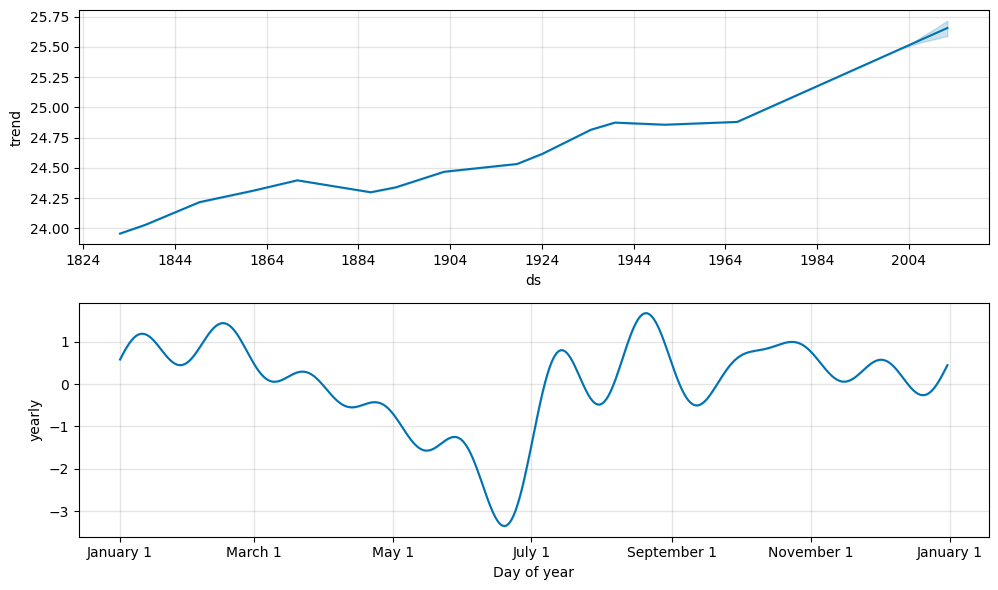

In [45]:
modelo.plot_components(previsao, figsize=(10,6));